## EDA

In [22]:
import csv
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd /content/drive/My\ Drive/Colab Notebooks/BAB_final

/content/drive/My Drive/Colab Notebooks/BAB_final


## 📌 음식물쓰레기데이터

In [25]:
plt.rc('font', family='Malgun Gothic')

In [26]:
food_waste = pd.read_csv('01_음식물쓰레기_FOOD_WASTE_210811_update.CSV', encoding='euc-kr')

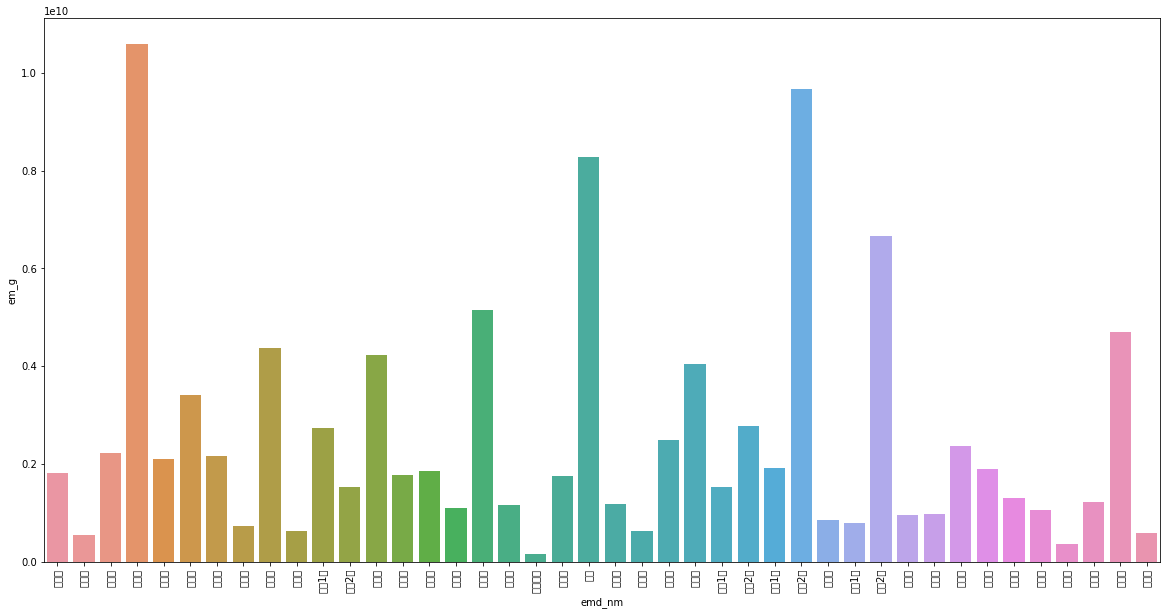

In [27]:
#읍면동별 총 음식물쓰레기 배출량

waste_groupby=food_waste.groupby(food_waste['emd_nm'],as_index=False).sum()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x='emd_nm', y='em_g', data=waste_groupby)

Text(0, 0.5, '쓰레기양')

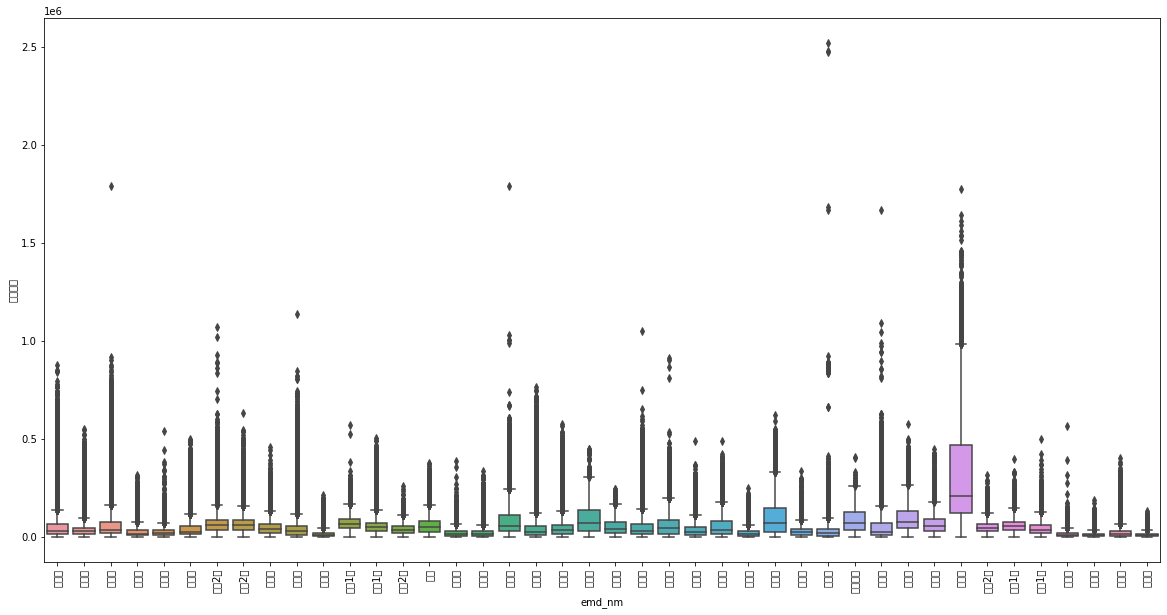

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(y='em_g', x='emd_nm',data=food_waste)
plt.xticks(rotation=90)
plt.ylabel('쓰레기양')

In [29]:
def remove_outliers_iqr():
    Q1 = food_waste.em_g.quantile(0.25)
    Q3 = food_waste.em_g.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    outliers = food_waste[
        (food_waste.em_g<lower_bound)|(food_waste.em_g>upper_bound)]
    no_outliers = food_waste[
        (food_waste.em_g>lower_bound)&(food_waste.em_g<upper_bound)]
    
    return no_outliers

Text(0, 0.5, '쓰레기양')

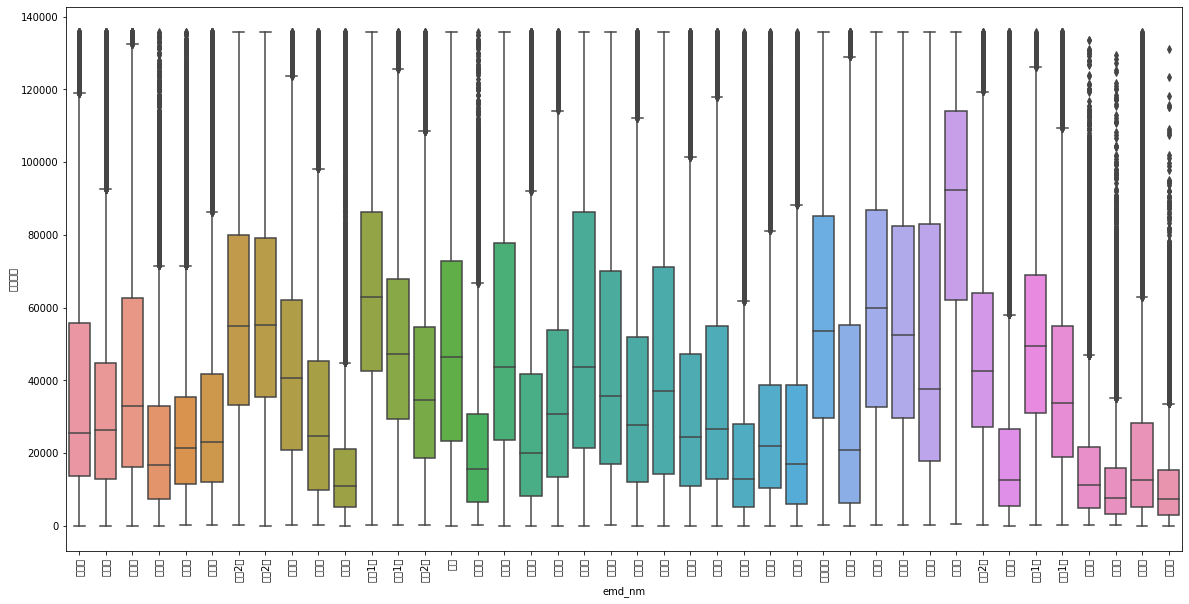

In [30]:
# IQR 필터링 --> 쓰레기양 음수 제거 데이터 boxplot

df=remove_outliers_iqr()

df=df[['em_g','emd_nm']]
#df=pd.DataFrame(fw)

plt.figure(figsize=(20,10))
sns.boxplot(y='em_g', x='emd_nm',data=df)
plt.xticks(rotation=90)
plt.ylabel('쓰레기양')

Text(0, 0.5, '쓰레기양')

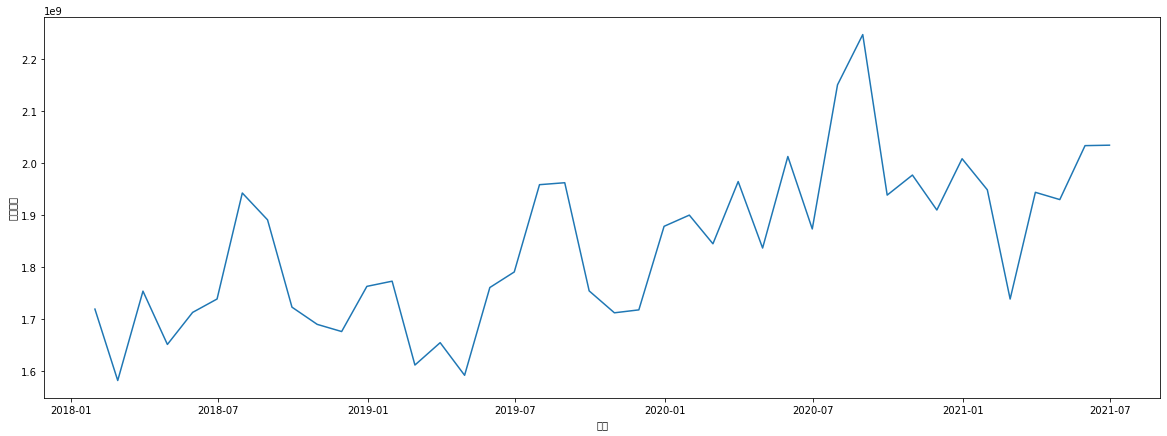

In [31]:
#월별 합산 배출량 추이

fw = remove_outliers_iqr()
fw['base_date']= pd.to_datetime(fw['base_date'])
fw = fw.set_index('base_date')
fw = fw.resample('1M').sum()

fig, ax = plt.subplots(figsize=(20,7))
ax.plot(fw['em_g'])
ax.set_xlabel('시간')
ax.set_ylabel('쓰레기양')

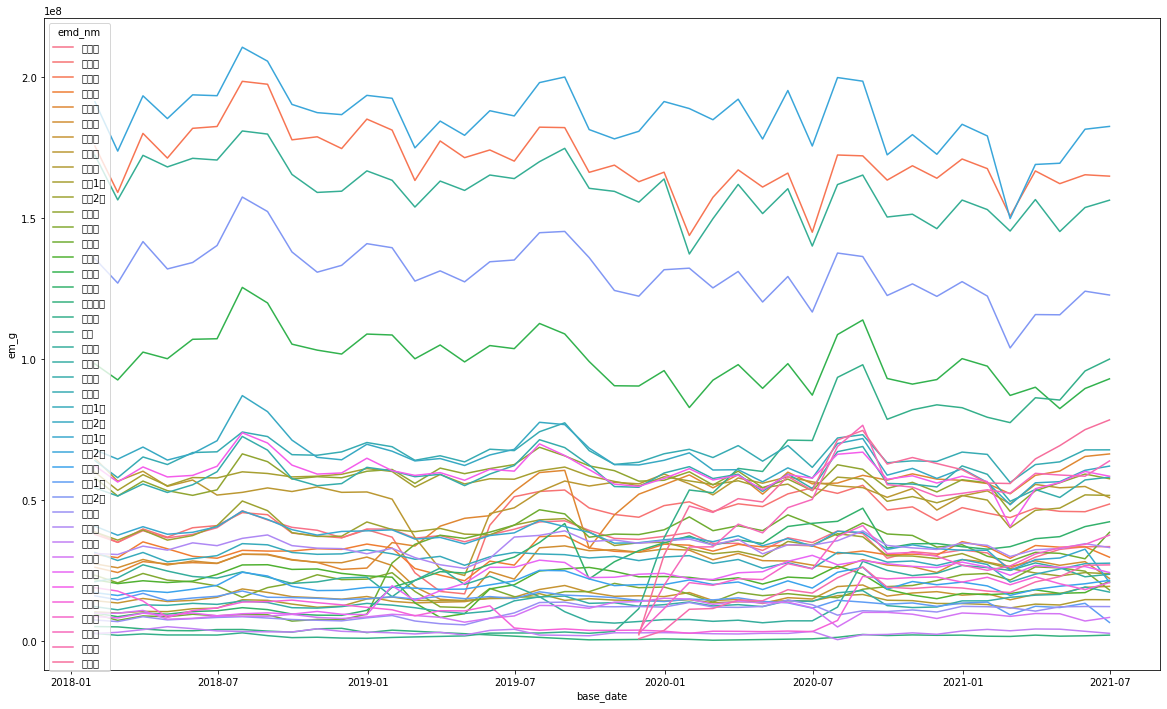

In [32]:
#읍면동별 총 음식물쓰레기 배출 추이

df=remove_outliers_iqr()
df = df.drop(['em_cnt', 'pay_amt'], axis=1)
df['base_date'] = pd.to_datetime(df['base_date'])
df = df.set_index('base_date')
grouper = df.groupby([pd.Grouper(freq='1M'), 'emd_nm'])

pltdf = pd.DataFrame(grouper.sum()).reset_index()
pltdf['base_date'] = pd.to_datetime(pltdf['base_date'])

fig, ax = plt.subplots(figsize=(20,12))
sns.lineplot(y='em_g', x='base_date',data=pltdf, hue='emd_nm')

Text(0.5, 0.98, '애월읍')

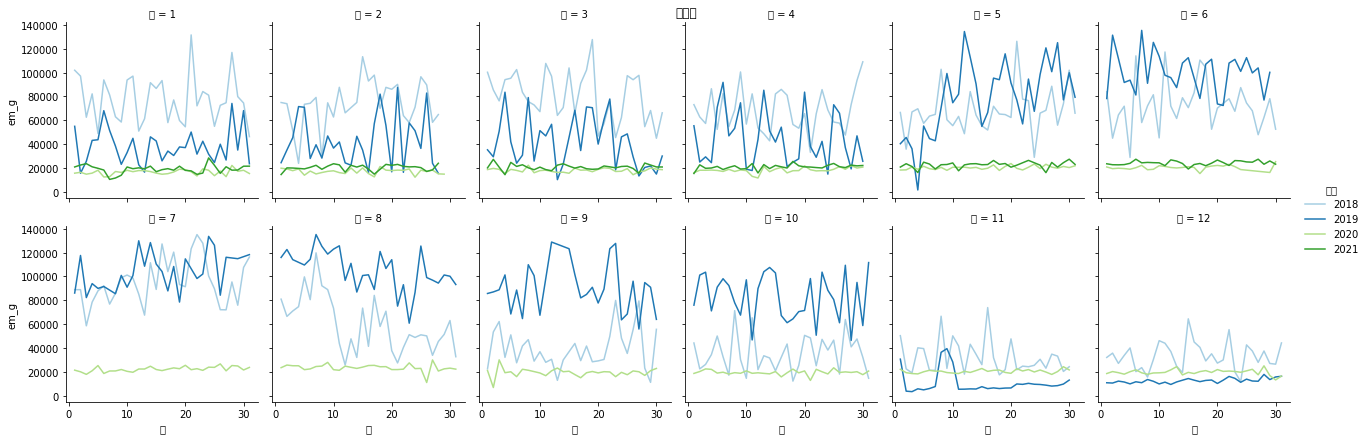

In [33]:
df = remove_outliers_iqr()
df['base_date']=pd.to_datetime(df['base_date'])
df['연도']=pd.DatetimeIndex(df['base_date']).year
df['월']=pd.DatetimeIndex(df['base_date']).month
df['일']=pd.DatetimeIndex(df['base_date']).day
df = df[df.emd_nm == '애월읍']
sns.relplot(data=df, x='일', y='em_g', col='월', hue='연도', kind='line', legend='full',
            col_wrap=6, height=3, ci=None, palette='Paired').fig.suptitle('애월읍')

### 전체배출량

In [34]:
# 피벗 데이터 사용
df=pd.read_csv('all_pivot.csv',encoding='EUC-KR')
df['base_date'] = df['base_date'].astype('str')
datas = df['base_date'].str.split('-')
df['year'] = datas.str.get(0)
df['month'] = datas.str.get(1)
df1=df.copy()
df['배출량'] = round(df['배출량'] / 1000, 0)
df1 = df1.rename({'배출량':'배출량_kg'}, axis=1)

In [35]:
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
year = ['2018','2019','2020','2021']

lst2=[]
for j in range(0,4,1):
    lst=[]
    for i in range(0,12,1):    
        value = df1[(df1['year'] == year[j]) & (df1['month'] == month[i])].배출량_kg.sum()
        lst.append(value)
    lst2.append(lst)
result = pd.DataFrame(lst2,index=[2018,2019,2020,2021],columns=[1,2,3,4,5,6,7,8,9,10,11,12])
result

,1,2,3,4,5,6,7,8,9,10,11,12
2018,1.714634e+09,1.577557e+09,1.749987e+09,1.648159e+09,1.709806e+09,1.735115e+09,1.938782e+09,1.887744e+09,1.720343e+09,1.686113e+09,1.672152e+09,1.760469e+09
2019,1.769550e+09,1.612343e+09,1.655332e+09,1.592655e+09,1.761291e+09,1.791185e+09,1.958906e+09,1.962662e+09,1.754318e+09,1.712169e+09,1.717728e+09,1.878075e+09
2020,1.899778e+09,1.845006e+09,1.964927e+09,1.837173e+09,2.013064e+09,1.873007e+09,2.149429e+09,2.244947e+09,1.936850e+09,1.975164e+09,1.908122e+09,2.006607e+09
2021,1.947234e+09,1.737490e+09,1.942066e+09,1.928486e+09,2.032030e+09,2.032630e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


## 📌 카드소비데이터

In [38]:
card = pd.read_csv('04_음식관련 카드소비_CARD_SPENDING.csv', encoding = 'EUC-KR')
print(card.info())
card.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   base_date   544805 non-null  object
 1   city        544805 non-null  object
 2   emd_cd      544805 non-null  object
 3   emd_nm      544805 non-null  object
 4   mct_cat_cd  544805 non-null  object
 5   mct_cat_nm  544805 non-null  object
 6   use_cnt     544805 non-null  int64 
 7   use_amt     544805 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 33.3+ MB
None


,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675


Text(0.5, 1.0, '카드결제금액')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


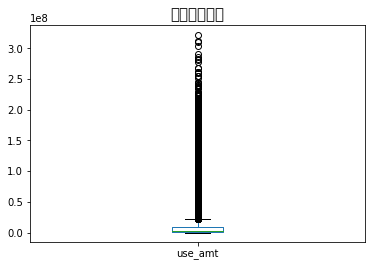

In [39]:
# 결제 금액 이상치 확인
import matplotlib.pyplot as plt
%matplotlib inline

card.plot(kind='box', y='use_amt')
plt.title("카드결제금액", fontsize=15) 

Text(0.5, 1.0, '카드결제건수')

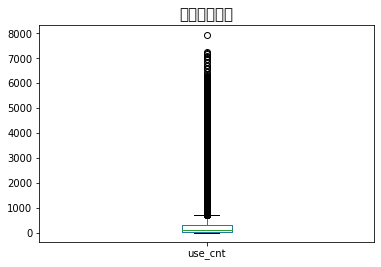

In [40]:
# 결제 건수 이상치 확인
import matplotlib.pyplot as plt
%matplotlib inline

card.plot(kind='box', y='use_cnt')
plt.title("카드결제건수", fontsize=15) 

In [41]:
# 일별 카테고리별 결제 금액
by_cat_amt = card.pivot_table(values="use_amt", index="base_date", columns="mct_cat_nm", aggfunc = 'sum')
by_cat_amt.head(2)

mct_cat_nm,간식,농축수산물,마트/슈퍼마켓,배달,부페,식품,아시아음식,양식,주점및주류판매,패스트푸드,한식
base_date,,,,,,,,,,,
2018-01-01,90507163.0,106564874.0,1.602637e+09,20891720.0,9927038.0,353227280.0,129502428.0,90252277.0,23005805.0,137806616.0,1.222256e+09
2018-01-02,99816982.0,194386951.0,1.286966e+09,15597155.0,4103287.0,376952977.0,124393475.0,59226949.0,30147400.0,97413908.0,1.117054e+09


[Text(0, 0, '-5억원'),
 Text(0, 0, '0억원'),
 Text(0, 0, '5억원'),
 Text(0, 0, '10억원'),
 Text(0, 0, '15억원'),
 Text(0, 0, '20억원'),
 Text(0, 0, '25억원'),
 Text(0, 0, '30억원'),
 Text(0, 0, '35억원')]

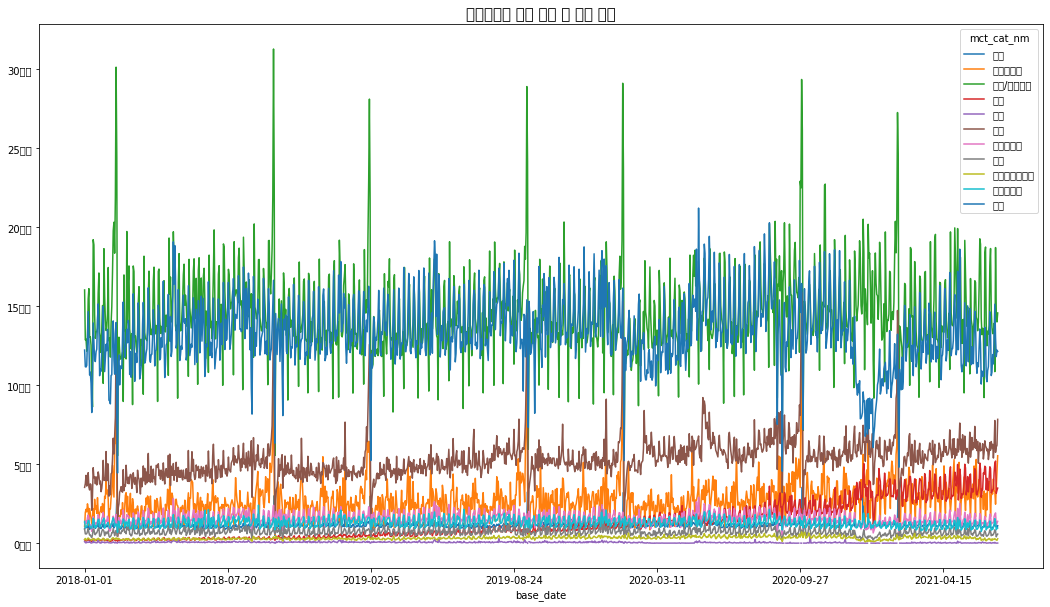

In [42]:
# 일별 카테고리별 결제 금액 추이
import matplotlib.ticker as mtick

by_cat_amt_plot = by_cat_amt.plot(figsize=(18, 10))

plt.title("카테고리별 카드 사용 총 금액 추이", fontsize=15)
ylabels = ['{:,.0f}'.format(y) + '억원' for y in by_cat_amt_plot.get_yticks()/100000000]
by_cat_amt_plot.set_yticklabels(ylabels)


In [43]:
# 일별 카테고리별 결제 건수
by_cat_cnt = card.pivot_table(values="use_cnt", index="base_date", columns="mct_cat_nm", aggfunc = 'sum')
by_cat_cnt.head(2)

mct_cat_nm,간식,농축수산물,마트/슈퍼마켓,배달,부페,식품,아시아음식,양식,주점및주류판매,패스트푸드,한식
base_date,,,,,,,,,,,
2018-01-01,7609.0,2380.0,40848.0,1057.0,90.0,9661.0,2840.0,2324.0,647.0,7731.0,33796.0
2018-01-02,8504.0,3194.0,38738.0,839.0,50.0,9790.0,3356.0,1544.0,642.0,5863.0,34644.0


[Text(0, 0, '-10,000건'),
 Text(0, 0, '0건'),
 Text(0, 0, '10,000건'),
 Text(0, 0, '20,000건'),
 Text(0, 0, '30,000건'),
 Text(0, 0, '40,000건'),
 Text(0, 0, '50,000건'),
 Text(0, 0, '60,000건'),
 Text(0, 0, '70,000건'),
 Text(0, 0, '80,000건')]

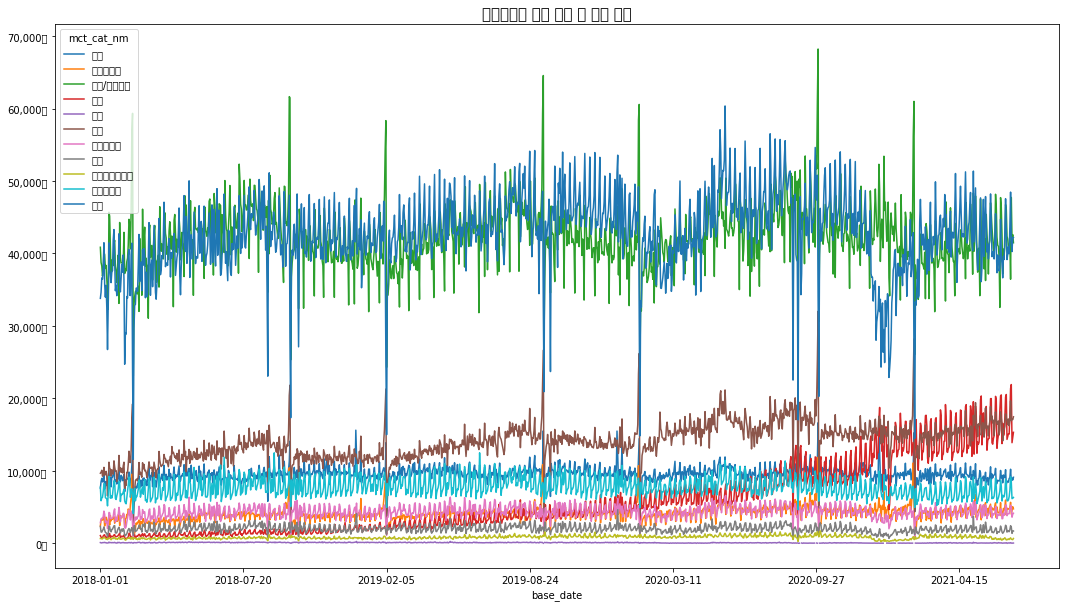

In [44]:
# 일별 카테고리별 결제 건수 추이

by_cat_cnt_plot = by_cat_cnt.plot(figsize=(18, 10))

plt.title("카테고리별 카드 사용 총 건수 추이", fontsize=15)
ylabels = ['{:,.0f}'.format(y) + '건' for y in by_cat_cnt_plot.get_yticks()]
by_cat_cnt_plot.set_yticklabels(ylabels)

## 정상성 검증

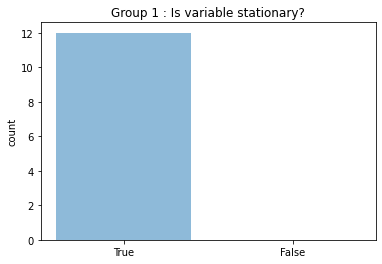

In [45]:
r_df = pd.read_csv('final4.csv', encoding='euc-kr')
r_df = r_df.drop(['Unnamed: 0'], axis=1).dropna()

#group1
group_1 = ['노형동', '이도2동', '연동']

make_group = r_df[['em_g','total_pop', '외식_use_amt', '장보기_use_amt']].groupby([r_df['base_date'],r_df['base_year'],r_df['base_month'],r_df['emd_nm']])
df = pd.DataFrame(make_group.sum()).reset_index()
df['base_date']= pd.to_datetime(df['base_date'])

g1_count = 0
g1_non_count=0

for i in range(len(group_1)):
    emd_nm=group_1[i]
    df2 = df[df['emd_nm']==emd_nm]
    df2 = df2.set_index('base_date')
    df2 = df2.drop(['base_year', 'base_month', 'emd_nm'], axis=1)
    
    for i in range(len(df2.columns)):
        result = adfuller(df2[df2.columns[i]])
        
        if result[1] < 0.05 :
            g1_count+=1
        else:
            g1_non_count +=1

objects = ('True', 'False')
y_pos = np.arange(len(objects))
counts = [g1_count, g1_non_count]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count')
plt.title('Group 1 : Is variable stationary?')

plt.show()

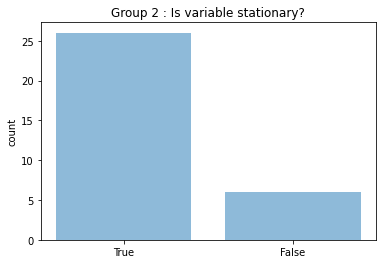

In [46]:
#group2

group_2=['외도동', '아라동', '삼양동', '일도2동', '화북동', '애월읍', '조천읍', '한림읍']
make_group = r_df[['em_g','resid_reg_pop', 'total_pop', '외식_use_amt']].groupby([r_df['base_date'],r_df['base_year'],r_df['base_month'],r_df['emd_nm']])
df = pd.DataFrame(make_group.sum()).reset_index()
df['base_date']= pd.to_datetime(df['base_date'])

g2_count = 0
g2_non_count=0

for i in range(len(group_2)):
    emd_nm=group_2[i]
    df2 = df[df['emd_nm']==emd_nm]
    df2 = df2.set_index('base_date')
    df2 = df2.drop(['base_year', 'base_month', 'emd_nm'], axis=1)
    
    for i in range(len(df2.columns)):
        result = adfuller(df2[df2.columns[i]])
        
        if result[1] < 0.05 :
            g2_count+=1
        else:
            g2_non_count +=1

objects = ('True', 'False')
y_pos = np.arange(len(objects))
performance = [g2_count, g2_non_count]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count')
plt.title('Group 2 : Is variable stationary?')

plt.show()